In [2]:
import numpy as np
from pandas import Series,DataFrame
import pandas as pd
import time
import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.figsize'] = (12.0, 6.0)

In [3]:
dframe = pd.read_csv('tp1_sensordata_15_05.csv', sep=',', parse_dates=[1], header=None,
                         names=['datetime', 'sec', 'ms', 'event_type', 'event_subtype', 'sensor_id','z','x','y','value', 'something'])

In [4]:
dframe.size

148082

In [5]:
dframe.dtypes

datetime          object
sec               object
ms                 int64
event_type        object
event_subtype      int64
sensor_id          int64
z                  int64
x                  int64
y                  int64
value            float64
something          int64
dtype: object

In [6]:
dframe['datetime'] = pd.to_datetime(dframe['datetime'])

In [7]:
sensor4df = pd.DataFrame(dframe.loc[dframe['sensor_id'] == 4])

In [8]:
sensor4df.head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,2130706433
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,2130706433
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,2130706433
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,2130706433
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,2130706433


In [9]:
sensor4s = sensor4df.ix[:,9]

In [10]:
sensor4s.index=sensor4df['datetime']

In [11]:
sensor4s.head()

datetime
2010-05-15 00:03:28    22.6
2010-05-15 00:13:31    22.6
2010-05-15 00:23:33    22.6
2010-05-15 00:33:35    22.6
2010-05-15 00:43:38    22.6
Name: value, dtype: float64

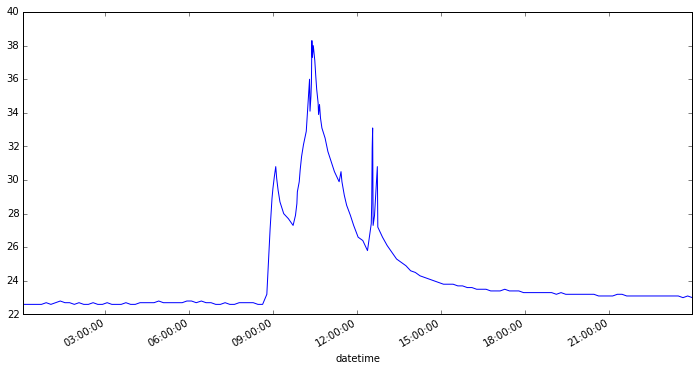

In [12]:
sensor4s.plot()

In [13]:
sensor4s.index

DatetimeIndex(['2010-05-15 00:03:28', '2010-05-15 00:13:31',
               '2010-05-15 00:23:33', '2010-05-15 00:33:35',
               '2010-05-15 00:43:38', '2010-05-15 00:53:40',
               '2010-05-15 01:03:43', '2010-05-15 01:13:46',
               '2010-05-15 01:23:49', '2010-05-15 01:33:51', 
               ...
               '2010-05-15 22:27:24', '2010-05-15 22:37:26',
               '2010-05-15 22:47:29', '2010-05-15 22:57:31',
               '2010-05-15 23:07:34', '2010-05-15 23:17:37',
               '2010-05-15 23:27:39', '2010-05-15 23:37:42',
               '2010-05-15 23:47:44', '2010-05-15 23:57:47'],
              dtype='datetime64[ns]', name=u'datetime', length=181, freq=None, tz=None)

In [14]:
sensor4s.mean()

25.675138121547

In [15]:
sensor4s_filtered = sensor4s[sensor4s>sensor4s.mean()-1]

In [16]:
sensor4s_filtered.describe

<bound method Series.describe of datetime
2010-05-15 08:49:18    24.9
2010-05-15 08:50:18    25.5
2010-05-15 08:52:18    26.5
2010-05-15 08:53:19    27.1
2010-05-15 08:55:19    28.0
2010-05-15 08:57:20    28.9
2010-05-15 08:59:20    29.5
2010-05-15 09:02:21    30.2
2010-05-15 09:05:22    30.8
2010-05-15 09:07:22    30.1
2010-05-15 09:10:23    29.4
2010-05-15 09:14:24    28.7
2010-05-15 09:22:27    28.0
2010-05-15 09:32:29    27.7
2010-05-15 09:42:32    27.3
2010-05-15 09:47:39    27.9
2010-05-15 09:50:39    28.6
2010-05-15 09:51:40    29.3
2010-05-15 09:55:41    29.9
2010-05-15 09:57:41    30.6
2010-05-15 10:00:42    31.4
2010-05-15 10:04:43    32.1
2010-05-15 10:10:44    32.9
2010-05-15 10:17:46    36.0
2010-05-15 10:18:46    34.1
2010-05-15 10:20:47    35.0
2010-05-15 10:21:47    35.8
2010-05-15 10:22:47    38.3
2010-05-15 10:23:49    37.3
2010-05-15 10:25:49    38.0
                       ... 
2010-05-15 10:41:12    33.7
2010-05-15 10:44:13    33.1
2010-05-15 10:51:02    32.5
2010-0

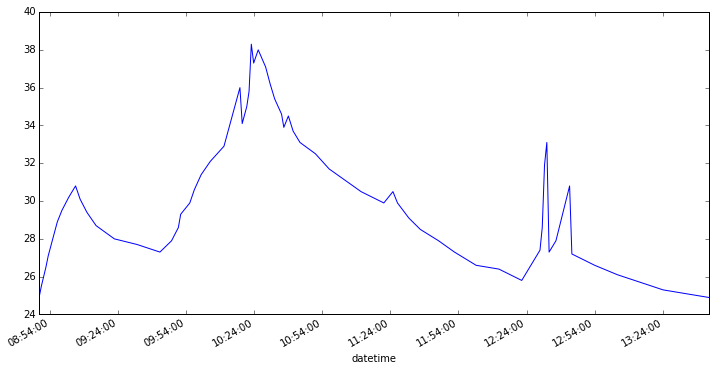

In [17]:
sensor4s_filtered.plot()

In [18]:
# group events in 10 min slots and sum values
sfg = sensor4s.groupby(pd.TimeGrouper('10Min')).sum()

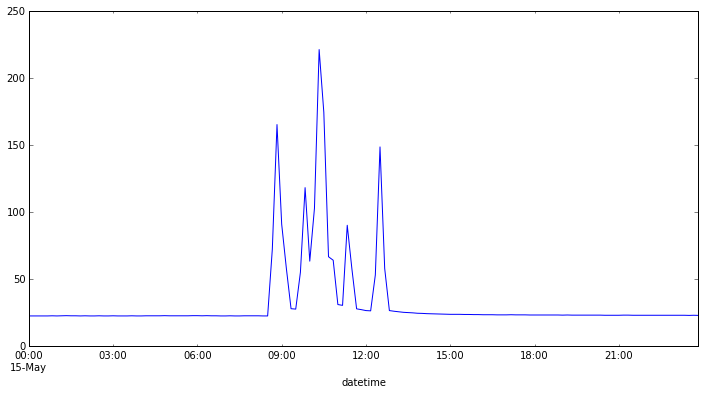

In [19]:
sfg.plot()

In [20]:
sfg.head()

datetime
2010-05-15 00:00:00    22.6
2010-05-15 00:10:00    22.6
2010-05-15 00:20:00    22.6
2010-05-15 00:30:00    22.6
2010-05-15 00:40:00    22.6
Freq: 10T, Name: value, dtype: float64

In [21]:
sfg.describe()

count    144.000000
mean      32.272222
std       29.495403
min       22.600000
25%       22.700000
50%       23.200000
75%       24.025000
max      221.500000
Name: value, dtype: float64

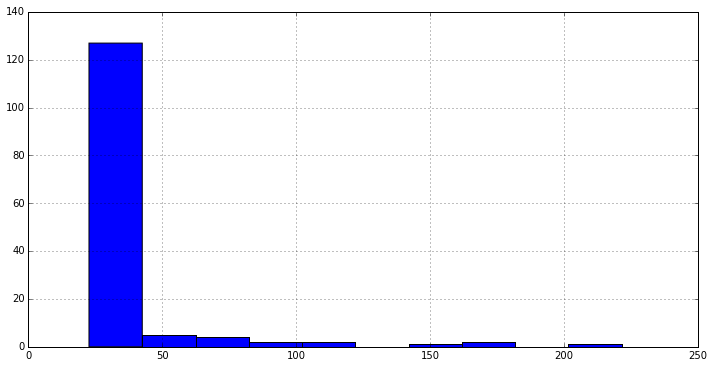

In [22]:
sfg.hist()

In [23]:
sfg.describe()

count    144.000000
mean      32.272222
std       29.495403
min       22.600000
25%       22.700000
50%       23.200000
75%       24.025000
max      221.500000
Name: value, dtype: float64

In [24]:
dframe.head(10)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something
0,2010-05-15 00:00:43,1273881643,38,R,0,6,573729,176,1,3.0,2130706433
1,2010-05-15 00:00:51,1273881651,50,R,0,6,573732,146,1,0.0,2130706433
2,2010-05-15 00:01:27,1273881687,54,R,0,3,573740,173,1,22.0,2130706433
3,2010-05-15 00:01:35,1273881695,870,R,0,6,573743,180,1,3.0,2130706433
4,2010-05-15 00:01:53,1273881713,974,R,0,6,573750,182,1,0.0,2130706433
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,2130706433
6,2010-05-15 00:03:30,1273881810,74,R,0,6,573771,183,1,0.0,2130706433
7,2010-05-15 00:05:55,1273881955,232,R,0,6,573805,174,1,0.0,2130706433
8,2010-05-15 00:06:29,1273881989,272,R,0,6,573811,173,1,3.0,2130706433
9,2010-05-15 00:06:51,1273882011,301,R,0,6,573817,178,1,3.0,2130706433


In [26]:
# calculate diff in seconds from day begin
dframe['seconddelta'] = dframe.datetime.map( lambda x: pd.to_datetime(x).hour*3600 + pd.to_datetime(x).minute*60 + pd.to_datetime(x).second )

In [27]:
dframe['msseconddelta'] = dframe.seconddelta + dframe.ms/1000

In [28]:
dframe[['msseconddelta', 'value']].values

array([[  4.30380000e+01,   3.00000000e+00],
       [  5.10500000e+01,   0.00000000e+00],
       [  8.70540000e+01,   2.20000000e+01],
       ..., 
       [  8.62922170e+04,   3.00000000e+00],
       [  8.62950080e+04,   3.00000000e+00],
       [  8.63181880e+04,   1.95000000e+01]])

In [29]:
sensor4df = pd.DataFrame(dframe.loc[dframe['sensor_id'] == 4])
# sensor 4 series2 with msseconddelta index
sensor4s2 = sensor4df.ix[:,9]
sensor4s2.index=sensor4df['msseconddelta']

In [30]:
sensor4s2.head()

msseconddelta
208.716     22.6
811.141     22.6
1413.564    22.6
2015.988    22.6
2618.413    22.6
Name: value, dtype: float64

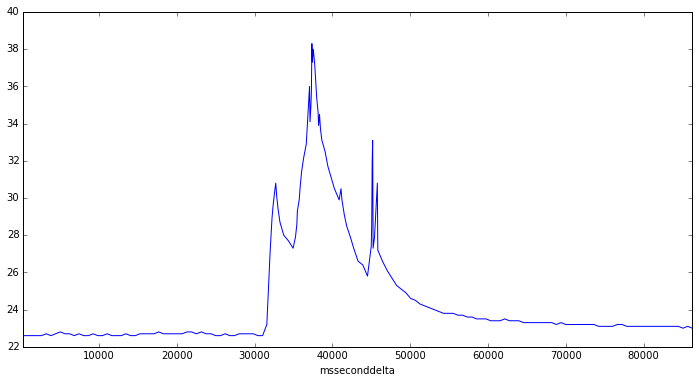

In [31]:
sensor4s2.plot()

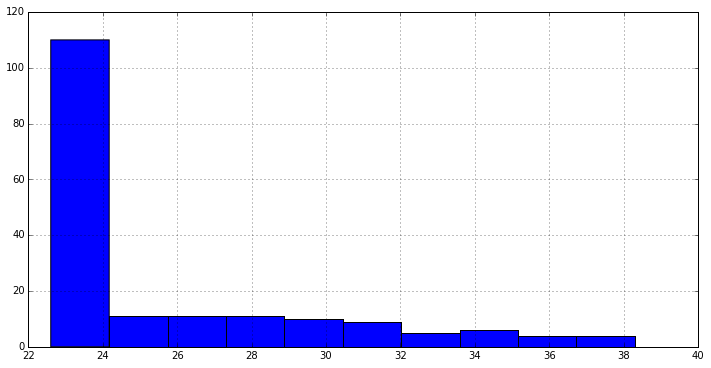

In [32]:
sensor4s2.hist()

In [33]:
sensor4s2.values

array([ 22.6,  22.6,  22.6,  22.6,  22.6,  22.7,  22.6,  22.7,  22.8,
        22.7,  22.7,  22.6,  22.7,  22.6,  22.6,  22.7,  22.6,  22.6,
        22.7,  22.6,  22.6,  22.6,  22.7,  22.6,  22.6,  22.7,  22.7,
        22.7,  22.7,  22.8,  22.7,  22.7,  22.7,  22.7,  22.7,  22.8,
        22.8,  22.7,  22.8,  22.7,  22.7,  22.6,  22.6,  22.7,  22.6,
        22.6,  22.7,  22.7,  22.7,  22.7,  22.6,  22.6,  23.2,  24.3,
        24.9,  25.5,  26.5,  27.1,  28. ,  28.9,  29.5,  30.2,  30.8,
        30.1,  29.4,  28.7,  28. ,  27.7,  27.3,  27.9,  28.6,  29.3,
        29.9,  30.6,  31.4,  32.1,  32.9,  36. ,  34.1,  35. ,  35.8,
        38.3,  37.3,  38. ,  37.1,  36.2,  35.4,  34.6,  33.9,  34.5,
        33.7,  33.1,  32.5,  31.7,  31.1,  30.5,  29.9,  30.5,  29.9,
        29.1,  28.5,  27.9,  27.3,  26.6,  26.4,  25.8,  27.4,  28.6,
        31.9,  33.1,  27.3,  27.9,  30.8,  27.2,  26.6,  26.1,  25.7,
        25.3,  25.1,  24.9,  24.6,  24.5,  24.3,  24.2,  24.1,  24. ,
        23.9,  23.8,

In [34]:
A = np.array(sensor4s2.index)

In [35]:
B = np.array(sensor4s2.values)


In [36]:
sensor4df.sec = sensor4df.sec.astype(float)

In [37]:
#group 2x2 values[msseconddelta, value] from sensor4df
C = sensor4df[['msseconddelta', 'value']].values

In [46]:
C

array([[  2.08716000e+02,   2.26000000e+01],
       [  8.11141000e+02,   2.26000000e+01],
       [  1.41356400e+03,   2.26000000e+01],
       [  2.01598800e+03,   2.26000000e+01],
       [  2.61841300e+03,   2.26000000e+01],
       [  3.22083600e+03,   2.27000000e+01],
       [  3.82326100e+03,   2.26000000e+01],
       [  4.42668500e+03,   2.27000000e+01],
       [  5.02911000e+03,   2.28000000e+01],
       [  5.63153400e+03,   2.27000000e+01],
       [  6.23395900e+03,   2.27000000e+01],
       [  6.83638500e+03,   2.26000000e+01],
       [  7.43880900e+03,   2.27000000e+01],
       [  8.04223600e+03,   2.26000000e+01],
       [  8.64466000e+03,   2.26000000e+01],
       [  9.24708600e+03,   2.27000000e+01],
       [  9.84951100e+03,   2.26000000e+01],
       [  1.04519340e+04,   2.26000000e+01],
       [  1.10543680e+04,   2.27000000e+01],
       [  1.16577950e+04,   2.26000000e+01],
       [  1.22602200e+04,   2.26000000e+01],
       [  1.28626450e+04,   2.26000000e+01],
       [  

In [47]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

In [48]:
# Fit a Dirichlet process mixture of Gaussians using five components
dpgmm = mixture.DPGMM(n_components=5, covariance_type='diag', n_iter=1000, alpha=100., params='wmc')
dpgmm.fit(C)

DPGMM(alpha=100.0, covariance_type='diag', init_params='wmc', min_covar=None,
   n_components=5, n_iter=1000, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=False)

In [49]:
color_iter = itertools.cycle(['r', 'g', 'b', 'c', 'm','y'])

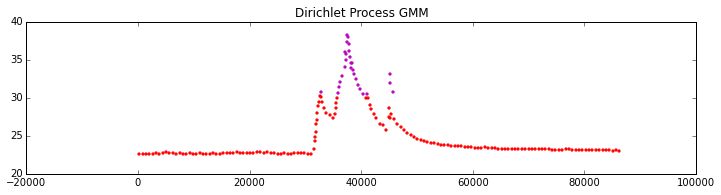

In [50]:
for i, (clf, title) in enumerate([(dpgmm, 'Dirichlet Process GMM')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(C)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(C[Y_ == i, 0], C[Y_ == i, 1], 5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        #splot.add_artist(ell)

    #plt.xlim(0, 100000)
    #plt.ylim(0, 70)
    #plt.xticks(())
    #plt.yticks(())
    plt.title(title)

In [51]:
dpgmm.means_[0][0]

0.0025317411150190912

In [82]:
Y = dpgmm.predict(C)

for i, (mean, covar, weight) in enumerate(zip(dpgmm.means_, dpgmm._get_covars(), dpgmm.weights_)):
        #print(C[Y_ == i, 0], C[Y_ == i, 1])
        meanx = mean[0]
        #seconds=(meanx/1000)%60
        #minutes=(meanx/(1000*60))%60
        #hours=(meanx/(3600))
        #if len(C[Y==i,0]) > 0:
        print "Cluster", i, " Elements: ",len(C[Y==i,0]), " Mean ", mean[0],time.strftime('%H:%M:%S', time.gmtime(mean[0]))#, " Time:", hours,":",minutes,":",seconds
        for z in enumerate(C[Y==i,0]):
            print "---", z[1]
            # append cluster# to row
            sensor4df.loc[sensor4df.msseconddelta == z[1], 'clusterX'] = i
                #print "Size:", pd.DataFrame(bedroomactivity.loc[bedroomactivity.msseconddelta == z[1]]).size

Cluster 0  Elements:  153  Mean  0.00253174111502 00:00:00
--- 208.716
--- 811.141
--- 1413.564
--- 2015.988
--- 2618.413
--- 3220.836
--- 3823.261
--- 4426.685
--- 5029.11
--- 5631.534
--- 6233.959
--- 6836.385
--- 7438.809
--- 8042.236
--- 8644.66
--- 9247.086
--- 9849.511
--- 10451.934
--- 11054.368
--- 11657.795
--- 12260.22
--- 12862.645
--- 13465.068
--- 14067.493
--- 14669.919
--- 15273.346
--- 15875.78
--- 16478.213
--- 17080.638
--- 17683.062
--- 18285.487
--- 18888.911
--- 19491.337
--- 20093.762
--- 20696.185
--- 21298.61
--- 21901.034
--- 22504.46
--- 23160.368
--- 23762.79
--- 24406.354
--- 25008.78
--- 25611.206
--- 26214.638
--- 26817.062
--- 27419.487
--- 28021.912
--- 28624.547
--- 29226.972
--- 29829.397
--- 30432.823
--- 31035.247
--- 31577.431
--- 31697.919
--- 31758.165
--- 31818.41
--- 31938.9
--- 31999.146
--- 32119.634
--- 32240.124
--- 32360.613
--- 32541.343
--- 32842.563
--- 33023.294
--- 33264.268
--- 33747.209
--- 34349.635
--- 34952.058
--- 35259.123
--- 3

In [81]:
sensor4df.head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,cluster,clusterX
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,2130706433,208,208.716,0,0
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,2130706433,811,811.141,0,0
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,2130706433,1413,1413.564,0,0
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,2130706433,2015,2015.988,0,0
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,2130706433,2618,2618.413,0,0


In [83]:
C[Y==0,0]#len(Y)#

array([   208.716,    811.141,   1413.564,   2015.988,   2618.413,
         3220.836,   3823.261,   4426.685,   5029.11 ,   5631.534,
         6233.959,   6836.385,   7438.809,   8042.236,   8644.66 ,
         9247.086,   9849.511,  10451.934,  11054.368,  11657.795,
        12260.22 ,  12862.645,  13465.068,  14067.493,  14669.919,
        15273.346,  15875.78 ,  16478.213,  17080.638,  17683.062,
        18285.487,  18888.911,  19491.337,  20093.762,  20696.185,
        21298.61 ,  21901.034,  22504.46 ,  23160.368,  23762.79 ,
        24406.354,  25008.78 ,  25611.206,  26214.638,  26817.062,
        27419.487,  28021.912,  28624.547,  29226.972,  29829.397,
        30432.823,  31035.247,  31577.431,  31697.919,  31758.165,
        31818.41 ,  31938.9  ,  31999.146,  32119.634,  32240.124,
        32360.613,  32541.343,  32842.563,  33023.294,  33264.268,
        33747.209,  34349.635,  34952.058,  35259.123,  35439.854,
        35500.101,  35741.075,  40869.316,  41230.78 ,  41531.

In [84]:
labels = dpgmm.predict(C)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [85]:
sensor4df['value'].mean()

25.675138121547

In [86]:
#append clustering to dataframe sensor4df
sensor4df['cluster'] = pd.Series(dpgmm.predict(C), index=sensor4df.index)

In [88]:
sensor4df[sensor4df.cluster>1]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,cluster,clusterX
2038,2010-05-15 09:05:22,1273914322,74,R,0,4,582767,173,1,30.8,2130706433,32722,32722.074,4,4
2492,2010-05-15 09:57:41,1273917461,565,R,0,4,583875,173,1,30.6,2130706433,35861,35861.565,4,4
2523,2010-05-15 10:00:42,1273917642,295,R,0,4,583945,173,1,31.4,2130706433,36042,36042.295,4,4
2556,2010-05-15 10:04:43,1273917883,267,R,0,4,584030,173,1,32.1,2130706433,36283,36283.267,4,4
2578,2010-05-15 10:10:44,1273918244,724,R,0,4,584130,173,1,32.9,2130706433,36644,36644.724,4,4
2620,2010-05-15 10:17:46,1273918666,421,R,0,4,584259,173,1,36.0,2130706433,37066,37066.421,4,4
2629,2010-05-15 10:18:46,1273918726,668,R,0,4,584281,173,1,34.1,2130706433,37126,37126.668,4,4
2636,2010-05-15 10:20:47,1273918847,167,R,0,4,584313,173,1,35.0,2130706433,37247,37247.167,4,4
2648,2010-05-15 10:21:47,1273918907,415,R,0,4,584336,173,1,35.8,2130706433,37307,37307.415,4,4
2680,2010-05-15 10:22:47,1273918967,872,R,0,4,584390,173,1,38.3,2130706433,37367,37367.872,4,4


In [90]:
#start cooking time
# take start time of cluster
sensor4df[sensor4df.cluster>2].datetime.min()


Timestamp('2010-05-15 09:05:22')

In [91]:
#end cooking time
sensor4df[sensor4df.cluster>2].datetime.max()

Timestamp('2010-05-15 12:42:59')

In [92]:
dpgmm.weights_

array([ 0.51078055,  0.01210404,  0.14252414,  0.08322668,  0.2513646 ])

In [93]:
dpgmm.bound_prec_

array([-11.81375868,  -6.13122108, -13.93399585, -13.83689466, -13.96401128])

In [94]:
dpgmm.means_

array([[  2.53174112e-03,   2.30394769e+01],
       [  3.69744831e-05,   5.49967932e-04],
       [  3.54207563e-04,   4.41097370e-01],
       [  1.92080414e-04,   2.35747028e-01],
       [  5.55956349e-04,   7.03944196e-01]])

In [95]:
sensor4df['valuediff'] = sensor4df.value.diff()

In [99]:
sensor4df.head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,cluster,clusterX,valuediff,valuediff2
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,2130706433,208,208.716,0,0,NaN,NaN
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,2130706433,811,811.141,0,0,0,0
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,2130706433,1413,1413.564,0,0,0,0
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,2130706433,2015,2015.988,0,0,0,0
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,2130706433,2618,2618.413,0,0,0,0


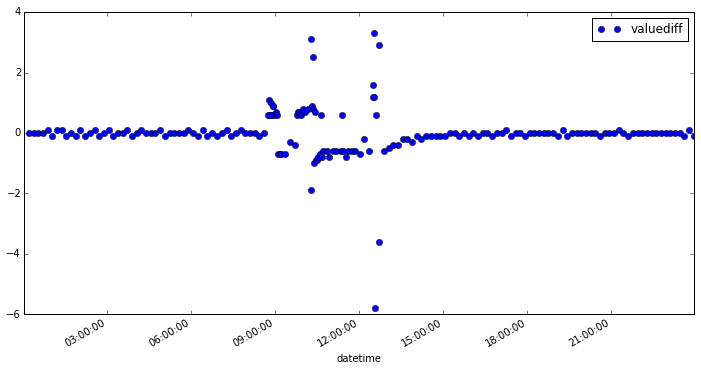

In [100]:
sensor4df.plot(x='datetime', y='valuediff', style='o')

In [101]:
# this is not valid due to static 0.2 variable
def valuation_formula(diff):
    if abs(diff) < 0.2:
        return 0
    else:
        return diff
    
sensor4df['valuediff2'] = sensor4df.apply(lambda row: valuation_formula(row['valuediff']), axis=1)

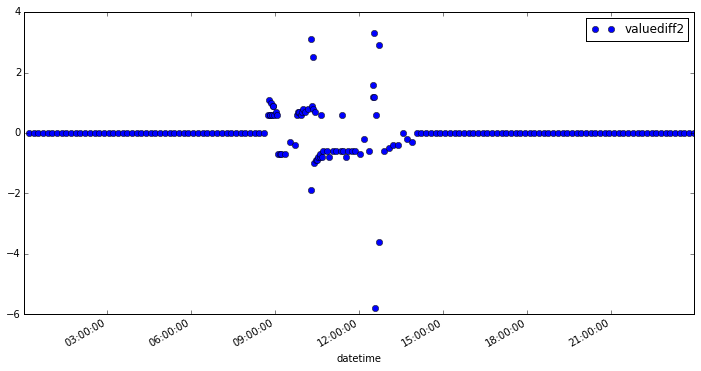

In [102]:
sensor4df.plot(x='datetime', y='valuediff2', style='o')

In [106]:
sensor4df['valuebit'] = sensor4df.valuediff2.map( lambda x: x > 0 )

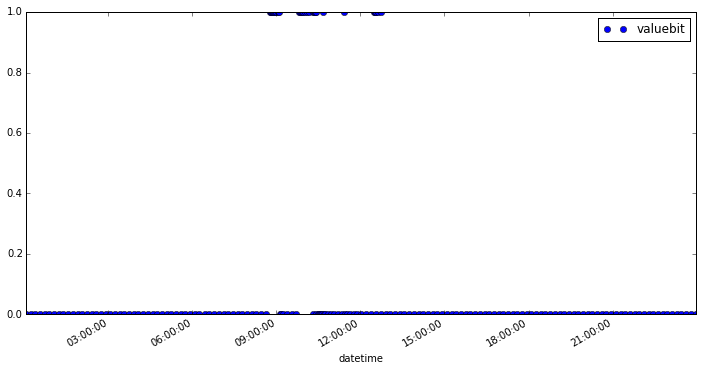

In [107]:
sensor4df.plot(x='datetime', y='valuebit', style='o')

In [108]:
CB = sensor4df[['sec', 'valuebit']].values

In [109]:
dpgmm = mixture.DPGMM(n_components=10, covariance_type='full', n_iter=1000, params='c')
dpgmm.fit(CB)

DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=10, n_iter=1000, params='c', random_state=None,
   thresh=None, tol=0.001, verbose=False)

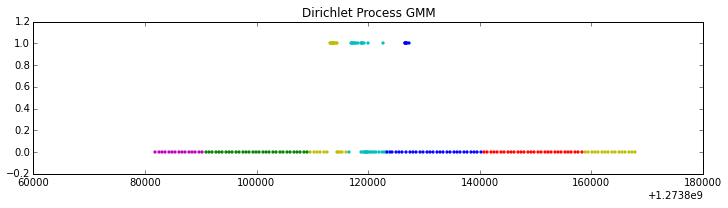

In [110]:
for i, (clf, title) in enumerate([(dpgmm, 'Dirichlet Process GMM')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(CB)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(CB[Y_ == i, 0], CB[Y_ == i, 1], 5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        #splot.add_artist(ell)

    plt.title(title)

In [111]:
sensor4dfCT = pd.DataFrame(sensor4df[sensor4df['valuebit']==True])

In [112]:
CT = sensor4dfCT[['msseconddelta', 'valuebit']].values

In [113]:
dpgmm = mixture.DPGMM(n_components=4, covariance_type='full', params='c', n_iter=1000)
dpgmm.fit(CT)

DPGMM(alpha=1.0, covariance_type='full', init_params='wmc', min_covar=None,
   n_components=4, n_iter=1000, params='c', random_state=None, thresh=None,
   tol=0.001, verbose=False)

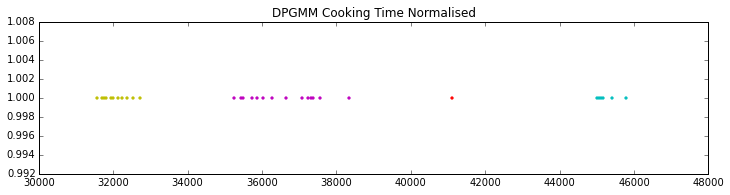

In [114]:
for i, (clf, title) in enumerate([(dpgmm, 'DPGMM Cooking Time Normalised')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(CT)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(CT[Y_ == i, 0], CT[Y_ == i, 1], 5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        #splot.add_artist(ell)

    plt.title(title)

In [116]:
YCT = dpgmm.predict(CT)

for i, (mean, covar, weight) in enumerate(zip(dpgmm.means_, dpgmm._get_covars(), dpgmm.weights_)):
        meanx = mean[0]
        if len(CT[YCT==i,0]) > 0:
            print "Cluster", i, " Elements: ",len(CT[YCT==i,0]), " Mean ", time.strftime('%H:%M:%S', time.gmtime(mean[0]))#, " Time:", hours,":",minutes,":",seconds
            #for z in enumerate(CT[YCT==i,0]):
            #    print "---"
                

Cluster 0  Elements:  6  Mean  12:34:17
Cluster 1  Elements:  14  Mean  10:09:06
Cluster 2  Elements:  11  Mean  08:54:30
Cluster 3  Elements:  1  Mean  11:25:10


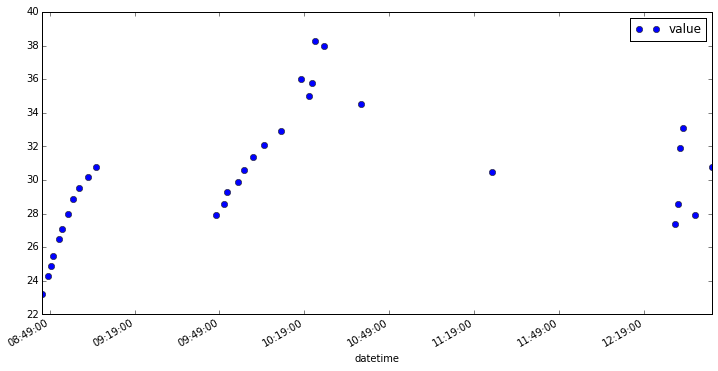

In [117]:
sensor4dfCT.plot(x='datetime', y='value', style='o')

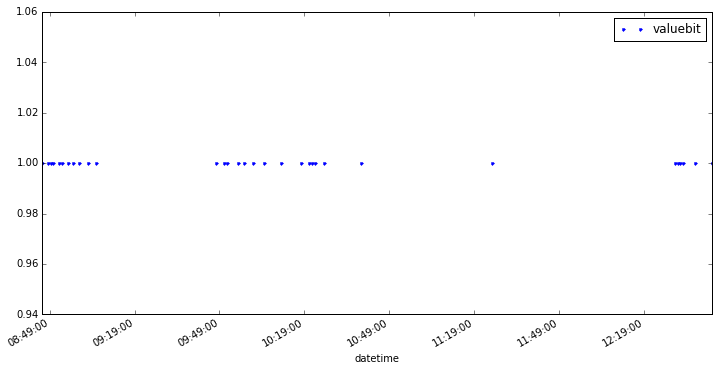

In [118]:
sensor4dfCT.plot(x='datetime', y='valuebit', style='.')

In [119]:
sensor4dfCT.head(5)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,cluster,clusterX,valuediff,valuediff2,valuebit
1758,2010-05-15 08:46:17,1273913177,431,R,0,4,582251,173,1,23.2,2130706433,31577,31577.431,0,0,0.6,0.6,True
1819,2010-05-15 08:48:17,1273913297,919,R,0,4,582333,173,1,24.3,2130706433,31697,31697.919,0,0,1.1,1.1,True
1836,2010-05-15 08:49:18,1273913358,165,R,0,4,582363,173,1,24.9,2130706433,31758,31758.165,0,0,0.6,0.6,True
1846,2010-05-15 08:50:18,1273913418,410,R,0,4,582384,173,1,25.5,2130706433,31818,31818.410,0,0,0.6,0.6,True
1865,2010-05-15 08:52:18,1273913538,900,R,0,4,582429,173,1,26.5,2130706433,31938,31938.900,0,0,1.0,1.0,True


In [122]:
import scipy.cluster.hierarchy as hcluster

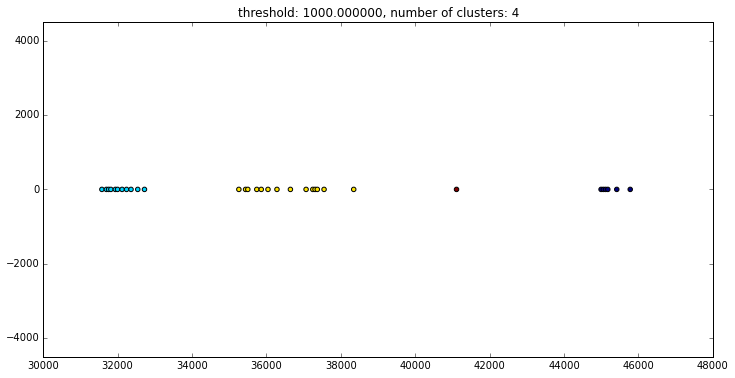

In [123]:
# generate 3 clusters of each around 100 points and an orphan vector
#N=100
#data = np.random.randn(3*N,2)

#data[:N] += 5
#data[-N:] += 10
#data[-1:] -= 20
data = CT
# clustering
thresh = 1000
clusters = hcluster.fclusterdata(data, thresh, criterion="distance")

# plotting
plt.scatter(*np.transpose(data), c=clusters)
plt.axis("equal")
title = "threshold: %f, number of clusters: %d" % (thresh, len(set(clusters)))
plt.title(title)
plt.show()

In [124]:
for i,k in zip(clusters,data):
    print i,k

2 [31577.431 True]
2 [31697.919 True]
2 [31758.165 True]
2 [31818.41 True]
2 [31938.9 True]
2 [31999.146 True]
2 [32119.634 True]
2 [32240.124 True]
2 [32360.613 True]
2 [32541.343 True]
2 [32722.074 True]
3 [35259.123 True]
3 [35439.854 True]
3 [35500.101 True]
3 [35741.075 True]
3 [35861.565 True]
3 [36042.295 True]
3 [36283.267 True]
3 [36644.724 True]
3 [37066.421 True]
3 [37247.167 True]
3 [37307.415 True]
3 [37367.872 True]
3 [37549.606 True]
3 [38346.833 True]
4 [41110.29 True]
1 [44996.353 True]
1 [45056.601 True]
1 [45116.846 True]
1 [45177.093 True]
1 [45418.07 True]
1 [45779.528 True]


In [132]:
np.transpose(data)

array([[31577.431, 31697.919, 31758.165, 31818.41, 31938.9, 31999.146,
        32119.634, 32240.124, 32360.613, 32541.343, 32722.074, 35259.123,
        35439.854, 35500.101, 35741.075, 35861.565, 36042.295, 36283.267,
        36644.724, 37066.421, 37247.167, 37307.415, 37367.872, 37549.606,
        38346.833, 41110.29, 44996.353, 45056.601, 45116.846, 45177.093,
        45418.07, 45779.528],
       [True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True]], dtype=object)

In [133]:
### trying to filter noise in valuedif2 ###
sensor4df['valuediff3'] = sensor4df.value.diff()


In [134]:
sensor4df.head(5)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,something,seconddelta,msseconddelta,cluster,clusterX,valuediff,valuediff2,valuebit,valuediff3
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,2130706433,208,208.716,0,0,NaN,NaN,False,NaN
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,2130706433,811,811.141,0,0,0,0,False,0
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,2130706433,1413,1413.564,0,0,0,0,False,0
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,2130706433,2015,2015.988,0,0,0,0,False,0
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,2130706433,2618,2618.413,0,0,0,0,False,0


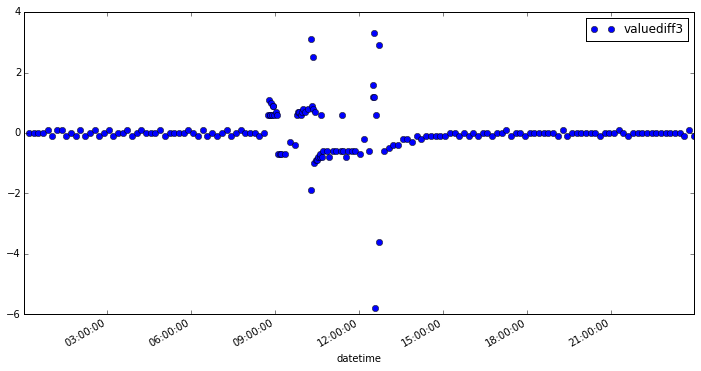

In [135]:
sensor4df.plot(x='datetime', y='valuediff3', style='o')

In [136]:
sensor4df['valuediff3'].value_counts()

 0.0    62
-0.1    16
-0.1    15
 0.1    10
-0.6     7
 0.1     7
 0.6     6
 0.6     5
 0.7     4
-0.6     4
-0.7     4
 0.8     3
 0.9     3
-0.8     3
-0.2     2
-0.7     2
 0.7     2
-0.9     2
-0.4     2
-0.2     2
 1.2     2
-1.9     1
 1.1     1
 1.0     1
 2.5     1
-0.8     1
-0.5     1
-0.4     1
 3.3     1
-0.3     1
 3.1     1
-0.8     1
 2.9     1
-3.6     1
-0.3     1
-5.8     1
 1.6     1
-1.0     1
dtype: int64

In [137]:
np.unique(sensor4df['valuediff3'].values)

array([-5.8, -3.6, -1.9, -1. , -0.9, -0.8, -0.8, -0.8, -0.7, -0.7, -0.6,
       -0.6, -0.5, -0.4, -0.4, -0.3, -0.3, -0.2, -0.2, -0.1, -0.1,  0. ,
        0.1,  0.1,  0.6,  0.6,  0.7,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
        1.6,  2.5,  2.9,  3.1,  3.3,  nan])

In [138]:
sensor4df['valuediff3'].values

array([ nan,  0. ,  0. ,  0. ,  0. ,  0.1, -0.1,  0.1,  0.1, -0.1,  0. ,
       -0.1,  0.1, -0.1,  0. ,  0.1, -0.1,  0. ,  0.1, -0.1,  0. ,  0. ,
        0.1, -0.1,  0. ,  0.1,  0. ,  0. ,  0. ,  0.1, -0.1,  0. ,  0. ,
        0. ,  0. ,  0.1,  0. , -0.1,  0.1, -0.1,  0. , -0.1,  0. ,  0.1,
       -0.1,  0. ,  0.1,  0. ,  0. ,  0. , -0.1,  0. ,  0.6,  1.1,  0.6,
        0.6,  1. ,  0.6,  0.9,  0.9,  0.6,  0.7,  0.6, -0.7, -0.7, -0.7,
       -0.7, -0.3, -0.4,  0.6,  0.7,  0.7,  0.6,  0.7,  0.8,  0.7,  0.8,
        3.1, -1.9,  0.9,  0.8,  2.5, -1. ,  0.7, -0.9, -0.9, -0.8, -0.8,
       -0.7,  0.6, -0.8, -0.6, -0.6, -0.8, -0.6, -0.6, -0.6,  0.6, -0.6,
       -0.8, -0.6, -0.6, -0.6, -0.7, -0.2, -0.6,  1.6,  1.2,  3.3,  1.2,
       -5.8,  0.6,  2.9, -3.6, -0.6, -0.5, -0.4, -0.4, -0.2, -0.2, -0.3,
       -0.1, -0.2, -0.1, -0.1, -0.1, -0.1, -0.1,  0. ,  0. , -0.1,  0. ,
       -0.1,  0. , -0.1,  0. ,  0. , -0.1,  0. ,  0. ,  0.1, -0.1,  0. ,
        0. , -0.1,  0. ,  0. ,  0. ,  0. ,  0. ,  0

In [139]:
sensor4df['valuediff3'].describe()

count    180.000000
mean       0.002222
std        0.813775
min       -5.800000
25%       -0.100000
50%        0.000000
75%        0.100000
max        3.300000
Name: valuediff3, dtype: float64

In [140]:
sensor4df['valuediff3'].quantile(.75)

0.099999999999997868

In [141]:
np.round(sensor4df['valuediff3'].quantile(.75), decimals=1)

0.10000000000000001

In [142]:
def filter_noise_in_temperature_diff(diff):
    if abs(diff) <= abs(np.round(sensor4df['valuediff3'].quantile(.75), decimals=2)) + 0.00001:
        return 0
    else:
        return diff
    
sensor4df['valuediffauto'] = sensor4df.apply(lambda row: filter_noise_in_temperature_diff(row['valuediff3']), axis=1)

In [143]:
sensor4df['valuebit2'] = sensor4df.valuediffauto.map( lambda x: x > 0 )

In [144]:
sensor4df.head(50)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,seconddelta,msseconddelta,cluster,clusterX,valuediff,valuediff2,valuebit,valuediff3,valuediffauto,valuebit2
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,...,208,208.716,0,0,NaN,NaN,False,NaN,NaN,False
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,...,811,811.141,0,0,0.0,0,False,0.0,0,False
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,...,1413,1413.564,0,0,0.0,0,False,0.0,0,False
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,...,2015,2015.988,0,0,0.0,0,False,0.0,0,False
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,...,2618,2618.413,0,0,0.0,0,False,0.0,0,False
87,2010-05-15 00:53:40,1273884820,836,R,0,4,574503,173,1,22.7,...,3220,3220.836,0,0,0.1,0,False,0.1,0,False
107,2010-05-15 01:03:43,1273885423,261,R,0,4,574653,173,1,22.6,...,3823,3823.261,0,0,-0.1,0,False,-0.1,0,False
124,2010-05-15 01:13:46,1273886026,685,R,0,4,574800,173,1,22.7,...,4426,4426.685,0,0,0.1,0,False,0.1,0,False
139,2010-05-15 01:23:49,1273886629,110,R,0,4,574945,173,1,22.8,...,5029,5029.110,0,0,0.1,0,False,0.1,0,False
154,2010-05-15 01:33:51,1273887231,534,R,0,4,575091,173,1,22.7,...,5631,5631.534,0,0,-0.1,0,False,-0.1,0,False


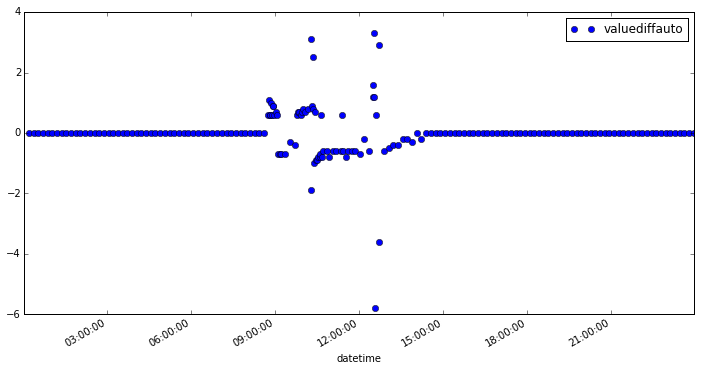

In [145]:
sensor4df.plot(x='datetime', y='valuediffauto', style='o')

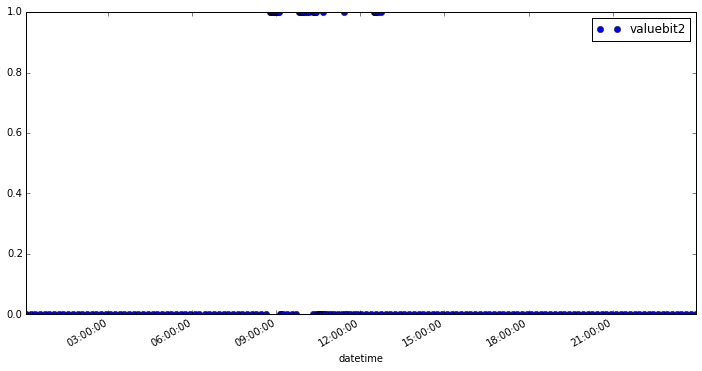

In [146]:
sensor4df.plot(x='datetime', y='valuebit2', style='o')

In [147]:
sensor4df['value'].describe()

count    181.000000
mean      25.675138
std        4.079337
min       22.600000
25%       22.700000
50%       23.400000
75%       27.900000
max       38.300000
Name: value, dtype: float64

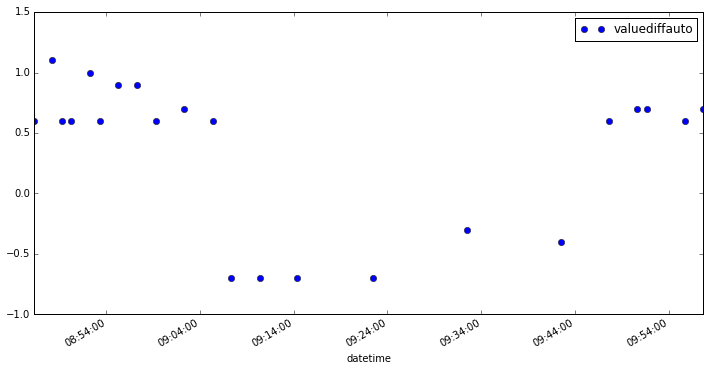

In [149]:
sensor4df[(sensor4df.datetime > '2010-05-15 08:40:00') & (sensor4df.datetime < '2010-05-15 10:00:00')].plot(x='datetime', y='valuediffauto', style='o')

In [150]:
sensor4df[(sensor4df.datetime > '2010-05-15 08:40:00') & (sensor4df.datetime < '2010-05-15 10:00:00')]

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,seconddelta,msseconddelta,cluster,clusterX,valuediff,valuediff2,valuebit,valuediff3,valuediffauto,valuebit2
1758,2010-05-15 08:46:17,1273913177,431,R,0,4,582251,173,1,23.2,...,31577,31577.431,0,0,0.6,0.6,True,0.6,0.6,True
1819,2010-05-15 08:48:17,1273913297,919,R,0,4,582333,173,1,24.3,...,31697,31697.919,0,0,1.1,1.1,True,1.1,1.1,True
1836,2010-05-15 08:49:18,1273913358,165,R,0,4,582363,173,1,24.9,...,31758,31758.165,0,0,0.6,0.6,True,0.6,0.6,True
1846,2010-05-15 08:50:18,1273913418,410,R,0,4,582384,173,1,25.5,...,31818,31818.410,0,0,0.6,0.6,True,0.6,0.6,True
1865,2010-05-15 08:52:18,1273913538,900,R,0,4,582429,173,1,26.5,...,31938,31938.900,0,0,1.0,1.0,True,1.0,1.0,True
1877,2010-05-15 08:53:19,1273913599,146,R,0,4,582453,173,1,27.1,...,31999,31999.146,0,0,0.6,0.6,True,0.6,0.6,True
1895,2010-05-15 08:55:19,1273913719,634,R,0,4,582497,173,1,28.0,...,32119,32119.634,0,0,0.9,0.9,True,0.9,0.9,True
1920,2010-05-15 08:57:20,1273913840,124,R,0,4,582548,173,1,28.9,...,32240,32240.124,0,0,0.9,0.9,True,0.9,0.9,True
1940,2010-05-15 08:59:20,1273913960,613,R,0,4,582593,173,1,29.5,...,32360,32360.613,0,0,0.6,0.6,True,0.6,0.6,True
1986,2010-05-15 09:02:21,1273914141,343,R,0,4,582678,173,1,30.2,...,32541,32541.343,0,0,0.7,0.7,True,0.7,0.7,True


In [152]:
prev_row = {}
prev_row['value'] = 'null'
prev_row['valuediffauto'] = 0.0
index = -1
output = index
def block_cooking(row):
    global prev_row, index, output
    #if prev_row is None: prev_row['value'] = 'none'
    
    # if prev <=0.0 && this > 0.0
    # index = 0
    # return index 
    # index++
    if prev_row['valuediffauto'] <= 0.0 and row['valuediffauto'] > 0.0:
        index = 0
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        index += 1
    # else if prev >= 0.0 && this > 0.0
    # return index
    # index++
    elif prev_row['valuediffauto'] >= 0.0 and row['valuediffauto'] > 0.0:
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        index += 1
    # else if this < 0.0
    # index = 0
    elif row['valuediffauto'] < 0.0:
        index = -1
        output = index
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
    else:
        print row['datetime'], row['valuediffauto'], row['value'], ', prev: ', prev_row['value'], ', index: ', index#, ', blockcounter: ', row['blockevent_counter']
        output = index
    
    prev_row = row
    return output
    #if row['valuediffauto'] <= 0.0:
    #    print 'valuediffnegativ'
    
sensor4df['blockevent_counter'] = sensor4df.apply(lambda row: block_cooking(row), axis=1)

2010-05-15 00:03:28 nan 22.6 , prev:  null , index:  -1
2010-05-15 00:13:31 0.0 22.6 , prev:  22.6 , index:  -1
2010-05-15 00:23:33 0.0 22.6 , prev:  22.6 , index:  -1
2010-05-15 00:33:35 0.0 22.6 , prev:  22.6 , index:  -1
2010-05-15 00:43:38 0.0 22.6 , prev:  22.6 , index:  -1
2010-05-15 00:53:40 0.0 22.7 , prev:  22.6 , index:  -1
2010-05-15 01:03:43 0.0 22.6 , prev:  22.7 , index:  -1
2010-05-15 01:13:46 0.0 22.7 , prev:  22.6 , index:  -1
2010-05-15 01:23:49 0.0 22.8 , prev:  22.7 , index:  -1
2010-05-15 01:33:51 0.0 22.7 , prev:  22.8 , index:  -1
2010-05-15 01:43:53 0.0 22.7 , prev:  22.7 , index:  -1
2010-05-15 01:53:56 0.0 22.6 , prev:  22.7 , index:  -1
2010-05-15 02:03:58 0.0 22.7 , prev:  22.6 , index:  -1
2010-05-15 02:14:02 0.0 22.6 , prev:  22.7 , index:  -1
2010-05-15 02:24:04 0.0 22.6 , prev:  22.6 , index:  -1
2010-05-15 02:34:07 0.0 22.7 , prev:  22.6 , index:  -1
2010-05-15 02:44:09 0.0 22.6 , prev:  22.7 , index:  -1
2010-05-15 02:54:11 0.0 22.6 , prev:  22.6 , ind

In [153]:
from itertools import cycle
li = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
running = True
licycle = cycle(li)
# Prime the pump
#nextelem = licycle.next()
prev_row = {}
prev_row['value'] = 'null'
prev_row['blockevent_counter'] = -1
block = 0
output = index
def block_cooking(row):
    global prev_row, block, output, nextelem

    if row['blockevent_counter'] == -1:
        nextelem = np.nan
    elif row['blockevent_counter'] == 0  and prev_row['blockevent_counter'] == -1: 
        nextelem = licycle.next()
        
    print row['datetime'],',', row['valuediffauto'],',', row['value'], ', blockcounter: ', row['blockevent_counter'], ',',nextelem
    prev_row = row
    return nextelem
    
sensor4df['cooking_event'] = sensor4df.apply(lambda row: block_cooking(row), axis=1)

2010-05-15 00:03:28 , nan , 22.6 , blockcounter:  -1 , nan
2010-05-15 00:13:31 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 00:23:33 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 00:33:35 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 00:43:38 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 00:53:40 , 0.0 , 22.7 , blockcounter:  -1 , nan
2010-05-15 01:03:43 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 01:13:46 , 0.0 , 22.7 , blockcounter:  -1 , nan
2010-05-15 01:23:49 , 0.0 , 22.8 , blockcounter:  -1 , nan
2010-05-15 01:33:51 , 0.0 , 22.7 , blockcounter:  -1 , nan
2010-05-15 01:43:53 , 0.0 , 22.7 , blockcounter:  -1 , nan
2010-05-15 01:53:56 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 02:03:58 , 0.0 , 22.7 , blockcounter:  -1 , nan
2010-05-15 02:14:02 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 02:24:04 , 0.0 , 22.6 , blockcounter:  -1 , nan
2010-05-15 02:34:07 , 0.0 , 22.7 , blockcounter:  -1 , nan
2010-05-15 02:44:09 , 0.0 , 22.6 , blockcounter:  -1 , n

In [154]:
sensor4df.head(30)

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,cluster,clusterX,valuediff,valuediff2,valuebit,valuediff3,valuediffauto,valuebit2,blockevent_counter,cooking_event
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,...,0,0,NaN,NaN,False,NaN,NaN,False,-1,NaN
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,...,0,0,0.0,0,False,0.0,0,False,-1,NaN
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,...,0,0,0.0,0,False,0.0,0,False,-1,NaN
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,...,0,0,0.0,0,False,0.0,0,False,-1,NaN
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,...,0,0,0.0,0,False,0.0,0,False,-1,NaN
87,2010-05-15 00:53:40,1273884820,836,R,0,4,574503,173,1,22.7,...,0,0,0.1,0,False,0.1,0,False,-1,NaN
107,2010-05-15 01:03:43,1273885423,261,R,0,4,574653,173,1,22.6,...,0,0,-0.1,0,False,-0.1,0,False,-1,NaN
124,2010-05-15 01:13:46,1273886026,685,R,0,4,574800,173,1,22.7,...,0,0,0.1,0,False,0.1,0,False,-1,NaN
139,2010-05-15 01:23:49,1273886629,110,R,0,4,574945,173,1,22.8,...,0,0,0.1,0,False,0.1,0,False,-1,NaN
154,2010-05-15 01:33:51,1273887231,534,R,0,4,575091,173,1,22.7,...,0,0,-0.1,0,False,-0.1,0,False,-1,NaN


In [155]:
sensor4df['timediff'] = sensor4df.datetime.diff()

In [156]:
sensor4df['msseconddeltadiff'] = sensor4df.msseconddelta.diff()

In [157]:
def view(row):
    print row['datetime'],',', row['valuediffauto'], ',',row['value'], ', cookcounter: ', row['blockevent_counter'], ',',row['cooking_event'], ',',row['timediff']

    
sensor4df.apply(lambda row: view(row), axis=1)

2010-05-15 00:03:28 , nan , 22.6 , cookcounter:  -1 , nan , NaT
2010-05-15 00:13:31 , 0.0 , 22.6 , cookcounter:  -1 , nan , 0 days 00:10:03
2010-05-15 00:23:33 , 0.0 , 22.6 , cookcounter:  -1 , nan , 0 days 00:10:02
2010-05-15 00:33:35 , 0.0 , 22.6 , cookcounter:  -1 , nan , 0 days 00:10:02
2010-05-15 00:43:38 , 0.0 , 22.6 , cookcounter:  -1 , nan , 0 days 00:10:03
2010-05-15 00:53:40 , 0.0 , 22.7 , cookcounter:  -1 , nan , 0 days 00:10:02
2010-05-15 01:03:43 , 0.0 , 22.6 , cookcounter:  -1 , nan , 0 days 00:10:03
2010-05-15 01:13:46 , 0.0 , 22.7 , cookcounter:  -1 , nan , 0 days 00:10:03
2010-05-15 01:23:49 , 0.0 , 22.8 , cookcounter:  -1 , nan , 0 days 00:10:03
2010-05-15 01:33:51 , 0.0 , 22.7 , cookcounter:  -1 , nan , 0 days 00:10:02
2010-05-15 01:43:53 , 0.0 , 22.7 , cookcounter:  -1 , nan , 0 days 00:10:02
2010-05-15 01:53:56 , 0.0 , 22.6 , cookcounter:  -1 , nan , 0 days 00:10:03
2010-05-15 02:03:58 , 0.0 , 22.7 , cookcounter:  -1 , nan , 0 days 00:10:02
2010-05-15 02:14:02 , 0.

5        None
23       None
38       None
53       None
68       None
87       None
107      None
124      None
139      None
154      None
169      None
186      None
204      None
249      None
264      None
279      None
296      None
315      None
337      None
356      None
372      None
394      None
415      None
441      None
461      None
479      None
495      None
514      None
530      None
550      None
         ... 
12317    None
12371    None
12412    None
12463    None
12516    None
12644    None
12706    None
12775    None
12842    None
12896    None
13021    None
13096    None
13125    None
13150    None
13166    None
13181    None
13197    None
13211    None
13245    None
13262    None
13279    None
13296    None
13316    None
13330    None
13344    None
13365    None
13382    None
13397    None
13444    None
13457    None
dtype: object

In [158]:
grp = sensor4df.groupby('cooking_event').sum()

In [160]:
grp

,sec,ms,event_subtype,sensor_id,z,x,y,value,something,seconddelta,...,cluster,clusterX,valuediff,valuediff2,valuebit,valuediff3,valuediffauto,valuebit2,blockevent_counter,msseconddeltadiff
cooking_event,,,,,,,,,,,,,,,,,,,,,
A,14013050369,4759,0,44,6407296,1903,11,298.9,23437770763,352769,...,4,4,8.2,8.2,11,8.2,8.2,11,55,1686.827
B,11465258235,3425,0,36,5255198,1557,9,278.7,19176357897,323835,...,20,20,8.7,8.7,9,8.7,8.7,9,36,2114.363
C,3821756721,1454,0,12,1753039,519,3,109.1,6392119299,111921,...,12,12,4.2,4.2,3,4.2,4.2,3,3,241.204
D,1273919149,606,0,4,584446,173,1,38.0,2130706433,37549,...,4,4,0.7,0.7,1,0.7,0.7,1,0,120.487
E,1273919946,833,0,4,584990,173,1,34.5,2130706433,38346,...,4,4,0.6,0.6,1,0.6,0.6,1,0,120.488
F,1273922710,290,0,4,586488,173,1,30.5,2130706433,41110,...,4,4,0.6,0.6,1,0.6,0.6,1,0,240.974
G,5095706745,1893,0,16,2355571,692,4,121.0,8522825732,180345,...,8,8,7.3,7.3,4,7.3,7.3,4,6,662.682
H,2547854397,598,0,8,1178503,346,2,58.7,4261412866,91197,...,4,4,3.5,3.5,2,3.5,3.5,2,1,542.189


In [161]:
print grp['msseconddeltadiff']['A']

1686.827


In [162]:
grp.index.values

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], dtype=object)

In [163]:
for g, ce in zip(grp.index, grp.index.values):
    print 'cooking group:', g, 'seconds:', grp['msseconddeltadiff'][ce], 'minutes: ', grp['msseconddeltadiff'][ce]/60

cooking group: A seconds: 1686.827 minutes:  28.1137833333
cooking group: B seconds: 2114.363 minutes:  35.2393833333
cooking group: C seconds: 241.204 minutes:  4.02006666667
cooking group: D seconds: 120.487 minutes:  2.00811666667
cooking group: E seconds: 120.488 minutes:  2.00813333333
cooking group: F seconds: 240.974 minutes:  4.01623333333
cooking group: G seconds: 662.682 minutes:  11.0447
cooking group: H seconds: 542.189 minutes:  9.03648333333


In [164]:
# cooking longer than 10min*60sec
print grp[grp.msseconddeltadiff > 600].index.values

['A' 'B' 'G']


In [165]:
filtereddf = pd.DataFrame()
for cg in grp[grp.msseconddeltadiff > 600].index.values:
    filtereddf = pd.concat([filtereddf,pd.DataFrame(sensor4df[sensor4df['cooking_event']==cg])], axis=0)
    #print sensor4df[sensor4df['cooking_event']==cg]

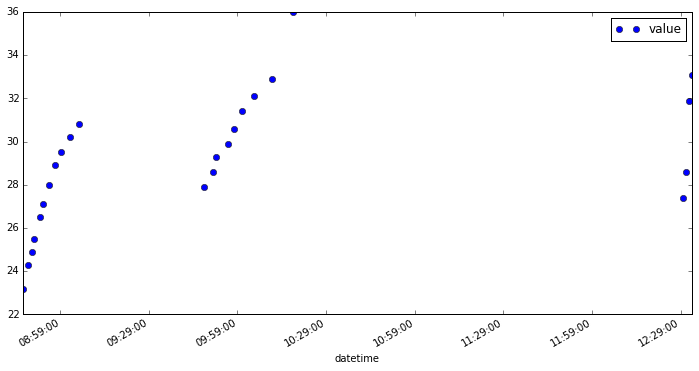

In [166]:
filtereddf.plot(x='datetime', y='value', style='o')

In [168]:
grp[grp.msseconddeltadiff < 600].index.values

array(['C', 'D', 'E', 'F', 'H'], dtype=object)

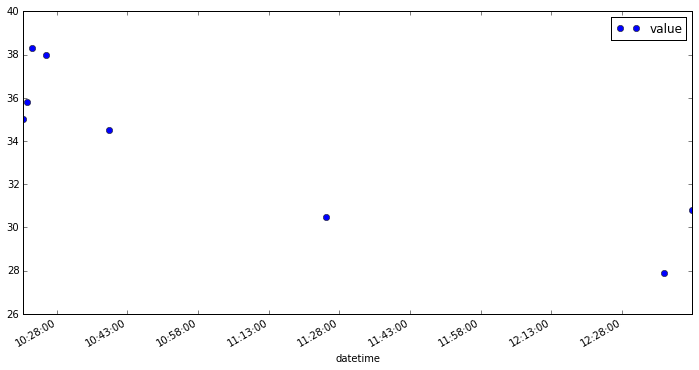

In [167]:
filtereddf = pd.DataFrame()
for cg in grp[grp.msseconddeltadiff < 600].index.values:
    filtereddf = pd.concat([filtereddf,pd.DataFrame(sensor4df[sensor4df['cooking_event']==cg])], axis=0)
    #print sensor4df[sensor4df['cooking_event']==cg]
filtereddf.plot(x='datetime', y='value', style='o')

In [169]:
sensor4df

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,valuediff,valuediff2,valuebit,valuediff3,valuediffauto,valuebit2,blockevent_counter,cooking_event,timediff,msseconddeltadiff
5,2010-05-15 00:03:28,1273881808,716,R,0,4,573769,173,1,22.6,...,NaN,NaN,False,NaN,NaN,False,-1,NaN,NaT,NaN
23,2010-05-15 00:13:31,1273882411,141,R,0,4,573918,173,1,22.6,...,0.0,0,False,0.0,0,False,-1,NaN,00:10:03,602.425
38,2010-05-15 00:23:33,1273883013,564,R,0,4,574063,173,1,22.6,...,0.0,0,False,0.0,0,False,-1,NaN,00:10:02,602.423
53,2010-05-15 00:33:35,1273883615,988,R,0,4,574208,173,1,22.6,...,0.0,0,False,0.0,0,False,-1,NaN,00:10:02,602.424
68,2010-05-15 00:43:38,1273884218,413,R,0,4,574353,173,1,22.6,...,0.0,0,False,0.0,0,False,-1,NaN,00:10:03,602.425
87,2010-05-15 00:53:40,1273884820,836,R,0,4,574503,173,1,22.7,...,0.1,0,False,0.1,0,False,-1,NaN,00:10:02,602.423
107,2010-05-15 01:03:43,1273885423,261,R,0,4,574653,173,1,22.6,...,-0.1,0,False,-0.1,0,False,-1,NaN,00:10:03,602.425
124,2010-05-15 01:13:46,1273886026,685,R,0,4,574800,173,1,22.7,...,0.1,0,False,0.1,0,False,-1,NaN,00:10:03,603.424
139,2010-05-15 01:23:49,1273886629,110,R,0,4,574945,173,1,22.8,...,0.1,0,False,0.1,0,False,-1,NaN,00:10:03,602.425
154,2010-05-15 01:33:51,1273887231,534,R,0,4,575091,173,1,22.7,...,-0.1,0,False,-0.1,0,False,-1,NaN,00:10:02,602.424


In [188]:
sensor4df[(sensor4df.datetime > '2010-05-15 08:40:00') & (sensor4df.datetime < '2010-05-15 10:00:00')].head()

,datetime,sec,ms,event_type,event_subtype,sensor_id,z,x,y,value,...,valuediff2,valuebit,valuediff3,valuediffauto,valuebit2,blockevent_counter,cooking_event,timediff,msseconddeltadiff,dpgmmcluster
1758,2010-05-15 08:46:17,1273913177,431,R,0,4,582251,173,1,23.2,...,0.6,True,0.6,0.6,True,0,A,00:09:02,542.184,NaN
1819,2010-05-15 08:48:17,1273913297,919,R,0,4,582333,173,1,24.3,...,1.1,True,1.1,1.1,True,1,A,00:02:00,120.488,NaN
1836,2010-05-15 08:49:18,1273913358,165,R,0,4,582363,173,1,24.9,...,0.6,True,0.6,0.6,True,2,A,00:01:01,60.246,NaN
1846,2010-05-15 08:50:18,1273913418,410,R,0,4,582384,173,1,25.5,...,0.6,True,0.6,0.6,True,3,A,00:01:00,60.245,NaN
1865,2010-05-15 08:52:18,1273913538,900,R,0,4,582429,173,1,26.5,...,1.0,True,1.0,1.0,True,4,A,00:02:00,120.490,NaN


In [173]:
#### clusterAnzahl schätzen ####

## method 1 (cooking event)
# cooking longer than 10min*60sec
cookevents = grp[grp.msseconddeltadiff > 600].index.values

cookevents

array(['A', 'B', 'G'], dtype=object)

In [176]:
mergeddf = pd.DataFrame()
for cg in cookevents:
    mergeddf = pd.concat([mergeddf,pd.DataFrame(sensor4df[sensor4df['cooking_event']==cg])], axis=0)
#mergeddf

In [183]:
mergedCT = mergeddf[['msseconddelta', 'valuebit']].values

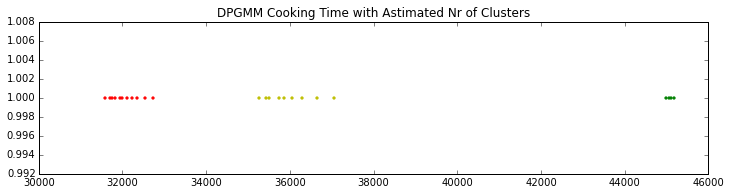

In [184]:

dpgmm = mixture.DPGMM(n_components=len(cookevents), covariance_type='full', params='c', n_iter=1000)
dpgmm.fit(mergedCT)

for i, (clf, title) in enumerate([(dpgmm, 'DPGMM Cooking Time with Astimated Nr of Clusters')]):
    splot = plt.subplot(2, 1, 1 + i)
    Y_ = clf.predict(mergedCT)
    for i, (mean, covar, color) in enumerate(zip(
            clf.means_, clf._get_covars(), color_iter)):
        v, w = linalg.eigh(covar)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(mergedCT[Y_ == i, 0], mergedCT[Y_ == i, 1], 5, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180 + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        #splot.add_artist(ell)

    plt.title(title)

In [196]:
## append clusterNr to dataframe
Y = dpgmm.predict(mergedCT)

for i, (mean, covar, weight) in enumerate(zip(dpgmm.means_, dpgmm._get_covars(), dpgmm.weights_)):
        #print(C[Y_ == i, 0], C[Y_ == i, 1])
        meanx = mean[0]
        #seconds=(meanx/1000)%60
        #minutes=(meanx/(1000*60))%60
        #hours=(meanx/(3600))
        #if len(C[Y==i,0]) > 0:
        print "Cluster", i, " Elements: ",len(mergedCT[Y==i,0]), " Mean ", mean[0],time.strftime('%H:%M:%S', time.gmtime(mean[0]))#, " Time:", hours,":",minutes,":",seconds
        for z in enumerate(mergedCT[Y==i,0]):
            #print "---", z[1]
            # append cluster# to row
            sensor4df.loc[sensor4df.msseconddelta == z[1], 'dpgmmcluster'] = i
                #print "Size:", pd.DataFrame(bedroomactivity.loc[bedroomactivity.msseconddelta == z[1]]).size

Cluster 0  Elements:  9  Mean  35982.0472222 09:59:42
Cluster 1  Elements:  11  Mean  32070.3417273 08:54:30
Cluster 2  Elements:  4  Mean  45086.72325 12:31:26


In [195]:
#sensor4df.drop('dpgmmcluster', axis=1, inplace=True)

In [1]:
sensor4df[(sensor4df.dpgmmcluster != 1)]

NameError: name 'sensor4df' is not defined